# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [98]:
genome_ids = ['HG02069', 'HG01846', 'HG02078', 'HG01851', 'HG01865', 'HG01862', 'HG02137', 'HG02050', 'HG02019', 'HG02029', 'HG02522', 'HG01850', 'HG02072', 'HG02139', 'HG02058', 'HG02081', 'HG01858', 'HG01867', 'HG02032', 'HG02122', 'HG01860', 'HG02016', 'HG01869', 'HG02061', 'HG02084', 'HG01852', 'HG02026', 'HG02521', 'HG01848', 'HG02130', 'HG02140', 'HG02113', 'HG02075', 'HG01598', 'HG02047', 'HG02121', 'HG01599', 'HG02136', 'HG01863', 'HG01874', 'HG02138', 'HG02025', 'HG01844', 'HG01845', 'HG02049', 'HG01870', 'HG02133', 'HG02088', 'HG02028', 'HG02076', 'HG01842', 'HG02023', 'HG02142', 'HG02035', 'HG02085', 'HG02086', 'HG02513', 'HG01873', 'HG02134', 'HG01871', 'HG01600', 'HG01868', 'HG02060', 'HG01878', 'HG02020', 'HG02127', 'HG01864', 'HG01595', 'HG02048', 'HG01847', 'HG01859', 'HG01861', 'HG01849', 'HG01843', 'HG02031', 'HG02512', 'HG01857', 'HG01853', 'HG02082', 'HG02073', 'HG02128', 'HG01855', 'HG02064', 'HG02040', 'HG02087', 'HG01597', 'HG02079', 'HG01872', 'HG02070', 'HG02131', 'HG02017', 'HG01866', 'HG02116', 'HG01840', 'HG01841', 'HG01596', 'HG02141', 'HG02067', 'HG02057']

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [100]:
root_dir = join(Path.home(), "cp_als/populations")

In [101]:
infile = join(root_dir, "output/KHV/all.csv")
infile

'/Users/lhvu/cp_als/populations/output/KHV/all.csv'

In [102]:
df = pd.read_csv(infile)

In [103]:
df = df[genome_ids + ["gene"]]

In [104]:
df.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,1,0,1,1,1,0,...,1,1,0,0,0,0,0,0,0,TARDBP


In [105]:
len(df.columns)

100

## Computer variant count per gene and per genome

In [106]:
sdf=df.groupby(["gene"]).sum()

In [107]:
sdf.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02131,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,20,2,7,24,46,21,22,21,61,...,23,6,22,62,24,5,5,3,23,5
ANG,0,1,0,6,8,0,1,0,0,5,...,0,0,8,1,0,2,4,16,1,0
ATXN2,6,4,4,7,12,16,20,6,1,5,...,3,4,5,2,5,7,1,8,8,6
C19ORF12,11,5,1,13,11,2,4,12,9,7,...,11,6,14,10,9,6,7,10,6,4
C9ORF72,14,23,15,12,11,24,13,22,12,32,...,22,2,33,10,3,32,3,12,2,12


## Compute mean99

In [108]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [109]:
mean99.head()

,0
HG02069,9.444444
HG01846,9.979798
HG02078,12.222222
HG01851,9.919192
HG01865,9.161616


In [110]:
m99 = mean99.transpose()

In [111]:
m99

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02131,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057
0,9.444444,9.979798,12.222222,9.919192,9.161616,10.606061,12.565657,9.181818,11.111111,8.434343,...,12.515152,6.333333,9.0,12.343434,7.373737,8.757576,4.10101,8.282828,11.89899,7.737374


## Name the row "mean99" to append to the dataframe 

In [112]:
m99.index=["mean99"]

In [113]:
m99.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02131,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057
mean99,9.444444,9.979798,12.222222,9.919192,9.161616,10.606061,12.565657,9.181818,11.111111,8.434343,...,12.515152,6.333333,9.0,12.343434,7.373737,8.757576,4.10101,8.282828,11.89899,7.737374


## Compute statistics per genome, across all genes

In [114]:
genome_stats= sdf.describe()

In [115]:
genome_stats.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02131,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,25.972222,27.444444,33.611111,27.277778,25.194444,29.166667,34.555556,25.250000,30.555556,23.194444,...,34.416667,17.416667,24.750000,33.944444,20.277778,24.083333,11.277778,22.777778,32.722222,21.277778
std,52.532159,98.655083,118.754796,76.323227,51.051693,90.729583,116.808866,64.205196,112.933974,48.310200,...,111.798384,42.790102,75.046795,104.774573,54.365226,74.131688,29.115152,73.198014,85.172971,60.235069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.750000,1.750000,1.000000,1.000000,...,1.000000,1.000000,1.750000,1.000000,1.000000,1.000000,0.750000,1.000000,3.500000,0.750000


### Adding new rows for genomes to show variant statistics

In [116]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [117]:
genome_stats_df

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02131,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057
ALS2,4.000000,20.000000,2.000000,7.000000,24.000000,46.000000,21.000000,22.000000,21.000000,61.000000,...,23.000000,6.000000,22.000000,62.000000,24.000000,5.000000,5.000000,3.000000,23.000000,5.000000
ANG,0.000000,1.000000,0.000000,6.000000,8.000000,0.000000,1.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,8.000000,1.000000,0.000000,2.000000,4.000000,16.000000,1.000000,0.000000
ATXN2,6.000000,4.000000,4.000000,7.000000,12.000000,16.000000,20.000000,6.000000,1.000000,5.000000,...,3.000000,4.000000,5.000000,2.000000,5.000000,7.000000,1.000000,8.000000,8.000000,6.000000
C19ORF12,11.000000,5.000000,1.000000,13.000000,11.000000,2.000000,4.000000,12.000000,9.000000,7.000000,...,11.000000,6.000000,14.000000,10.000000,9.000000,6.000000,7.000000,10.000000,6.000000,4.000000
C9ORF72,14.000000,23.000000,15.000000,12.000000,11.000000,24.000000,13.000000,22.000000,12.000000,32.000000,...,22.000000,2.000000,33.000000,10.000000,3.000000,32.000000,3.000000,12.000000,2.000000,12.000000
CHCHD10,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
CHMP2B,14.000000,4.000000,8.000000,7.000000,1.000000,12.000000,5.000000,6.000000,9.000000,10.000000,...,8.000000,12.000000,0.000000,9.000000,7.000000,2.000000,6.000000,9.000000,9.000000,1.000000
CHRNA3,23.000000,24.000000,16.000000,28.000000,19.000000,19.000000,15.000000,13.000000,25.000000,25.000000,...,17.000000,22.000000,5.000000,23.000000,5.000000,21.000000,34.000000,17.000000,34.000000,20.000000
CREST,103.000000,3.000000,4.000000,1.000000,88.000000,0.000000,3.000000,88.000000,19.000000,3.000000,...,2.000000,89.000000,99.000000,88.000000,4.000000,18.000000,2.000000,4.000000,12.000000,91.000000
DAO,3.000000,1.000000,8.000000,6.000000,2.000000,7.000000,2.000000,2.000000,5.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,8.000000,2.000000


### Compute per gene stats

In [118]:
gene_df = sdf.transpose().describe()

In [119]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,99.0,15.101010,13.522087,1.0,4.0,9.0,22.0,62.0
ANG,99.0,2.111111,2.551066,0.0,0.0,1.0,3.5,16.0
ATXN2,99.0,5.959596,4.591294,0.0,3.0,5.0,8.0,20.0
C19ORF12,99.0,8.808081,4.581856,0.0,5.0,9.0,12.0,20.0
C9ORF72,99.0,15.979798,9.584192,0.0,11.0,14.0,23.0,35.0
CHCHD10,99.0,0.494949,0.628794,0.0,0.0,0.0,1.0,3.0
CHMP2B,99.0,7.878788,4.324285,0.0,5.0,8.0,10.0,17.0
CHRNA3,99.0,19.434343,9.221937,0.0,15.0,19.0,24.0,38.0
CREST,99.0,39.737374,42.483030,0.0,2.0,11.0,88.0,103.0


In [120]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [121]:
rdf.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02067,HG02057,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,20,2,7,24,46,21,22,21,61,...,23,5,99.0,15.101010,13.522087,1.0,4.0,9.0,22.0,62.0
ANG,0,1,0,6,8,0,1,0,0,5,...,1,0,99.0,2.111111,2.551066,0.0,0.0,1.0,3.5,16.0
ATXN2,6,4,4,7,12,16,20,6,1,5,...,8,6,99.0,5.959596,4.591294,0.0,3.0,5.0,8.0,20.0
C19ORF12,11,5,1,13,11,2,4,12,9,7,...,6,4,99.0,8.808081,4.581856,0.0,5.0,9.0,12.0,20.0
C9ORF72,14,23,15,12,11,24,13,22,12,32,...,2,12,99.0,15.979798,9.584192,0.0,11.0,14.0,23.0,35.0


In [122]:
rdf

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02067,HG02057,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,20,2,7,24,46,21,22,21,61,...,23,5,99.0,15.101010,13.522087,1.0,4.0,9.0,22.0,62.0
ANG,0,1,0,6,8,0,1,0,0,5,...,1,0,99.0,2.111111,2.551066,0.0,0.0,1.0,3.5,16.0
ATXN2,6,4,4,7,12,16,20,6,1,5,...,8,6,99.0,5.959596,4.591294,0.0,3.0,5.0,8.0,20.0
C19ORF12,11,5,1,13,11,2,4,12,9,7,...,6,4,99.0,8.808081,4.581856,0.0,5.0,9.0,12.0,20.0
C9ORF72,14,23,15,12,11,24,13,22,12,32,...,2,12,99.0,15.979798,9.584192,0.0,11.0,14.0,23.0,35.0
CHCHD10,1,0,1,2,1,1,1,0,0,1,...,0,0,99.0,0.494949,0.628794,0.0,0.0,0.0,1.0,3.0
CHMP2B,14,4,8,7,1,12,5,6,9,10,...,9,1,99.0,7.878788,4.324285,0.0,5.0,8.0,10.0,17.0
CHRNA3,23,24,16,28,19,19,15,13,25,25,...,34,20,99.0,19.434343,9.221937,0.0,15.0,19.0,24.0,38.0
CREST,103,3,4,1,88,0,3,88,19,3,...,12,91,99.0,39.737374,42.483030,0.0,2.0,11.0,88.0,103.0


# Plot bar chart of total variant counts per gene


In [123]:
df = pd.read_csv(infile)
df = df[['gene','POS']]

In [124]:
gdf=df.groupby(["gene"]).count()

In [125]:
gdf

,POS
gene,
ALS2,191
ANG,40
ATXN2,223
C19ORF12,71
C9ORF72,98
CHCHD10,8
CHMP2B,72
CHRNA3,114
CREST,198


In [126]:
gdf.reset_index(inplace=True)

In [127]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [128]:
gdf

,gene,variant_count
0,ERBB4,4285
1,NEK1,712
2,FIG4,415
3,SETX,313
4,SPG11,305
5,ELP3,284
6,ATXN2,223
7,CREST,198
8,VAPB,192
9,ALS2,191


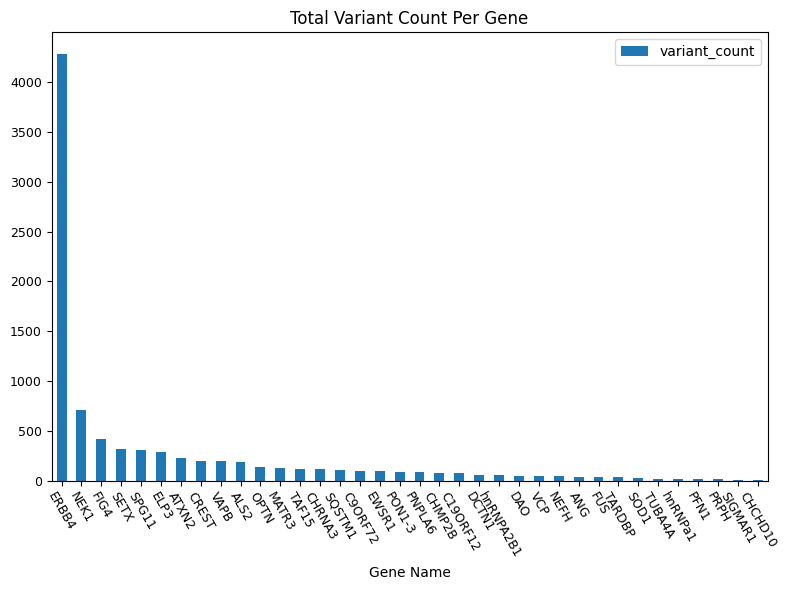

In [129]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [130]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [131]:
df = pd.read_csv(infile)
df = df[genome_ids]

## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [132]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [133]:
hdf.reset_index(inplace=True)

In [134]:
hdf.head()

,index,count
0,HG02069,935
1,HG01846,988
2,HG02078,1210
3,HG01851,982
4,HG01865,907


In [135]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(904.10101010101, 216.76096563601823)

## Find top and bottom genomes using mean & STD

In [136]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [137]:
len(top_genomes)

18

In [138]:
len(bottom_genomes)

17

In [139]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [140]:
sdf.head()

,HG02069,HG01846,HG02078,HG01851,HG01865,HG01862,HG02137,HG02050,HG02019,HG02029,...,HG02131,HG02017,HG01866,HG02116,HG01840,HG01841,HG01596,HG02141,HG02067,HG02057
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,4,20,2,7,24,46,21,22,21,61,...,23,6,22,62,24,5,5,3,23,5
ANG,0,1,0,6,8,0,1,0,0,5,...,0,0,8,1,0,2,4,16,1,0
ATXN2,6,4,4,7,12,16,20,6,1,5,...,3,4,5,2,5,7,1,8,8,6
C19ORF12,11,5,1,13,11,2,4,12,9,7,...,11,6,14,10,9,6,7,10,6,4
C9ORF72,14,23,15,12,11,24,13,22,12,32,...,22,2,33,10,3,32,3,12,2,12


In [141]:
tgdf= sdf.loc[top_genes]

In [142]:
tgdf_top_genomes = tgdf[top_genomes]

In [143]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [144]:
tgdf_top_genomes.head()

,HG02078,HG02137,HG01858,HG01869,HG01852,HG02075,HG02025,HG01845,HG01842,HG02127,HG01864,HG02048,HG02064,HG02087,HG01872,HG02131,HG02116,HG02067
gene,,,,,,,,,,,,,,,,,,
ERBB4,687,689,763,609,493,770,739,871,725,823,687,667,737,688,578,658,611,482
NEK1,233,187,188,186,209,13,189,4,234,8,190,193,4,211,193,188,184,190
FIG4,20,4,39,32,56,25,27,12,84,21,60,83,60,34,73,58,43,44
SETX,27,37,50,51,25,54,52,68,53,40,39,63,27,19,30,49,8,51
SPG11,58,60,57,5,56,3,6,59,2,89,5,3,91,50,94,4,51,117


In [145]:
tgdf_bot_genomes.head()

,HG02522,HG02072,HG02139,HG02130,HG02113,HG02047,HG02086,HG01873,HG01600,HG01868,HG02060,HG02020,HG01595,HG01847,HG01861,HG02017,HG01596
gene,,,,,,,,,,,,,,,,,
ERBB4,293,253,299,291,173,291,269,224,298,253,187,207,282,204,174,241,171
NEK1,6,4,7,39,10,183,7,10,6,19,6,9,4,8,6,10,9
FIG4,12,42,73,60,22,51,78,37,4,39,17,53,52,42,44,69,19
SETX,55,23,53,7,37,6,51,32,27,8,26,64,25,42,10,41,7
SPG11,59,59,6,4,129,6,6,5,49,58,95,52,4,59,94,4,2


## Plot stacked bar chart for top genes & top genomes

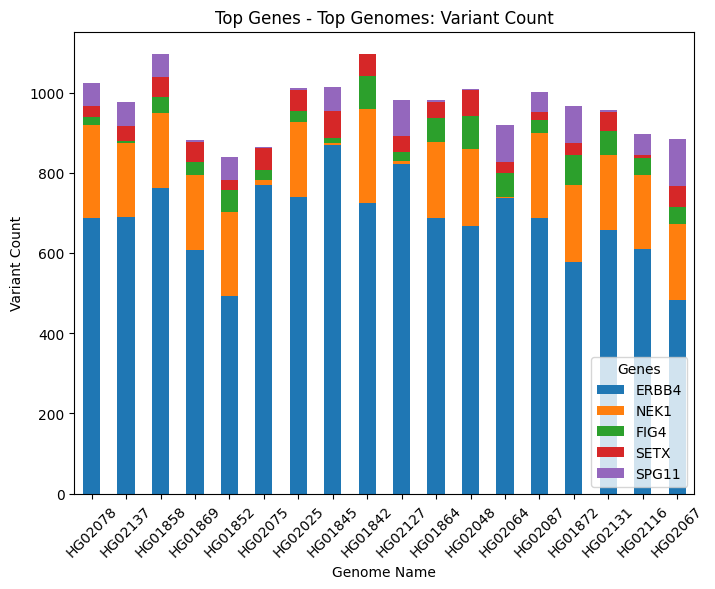

In [146]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

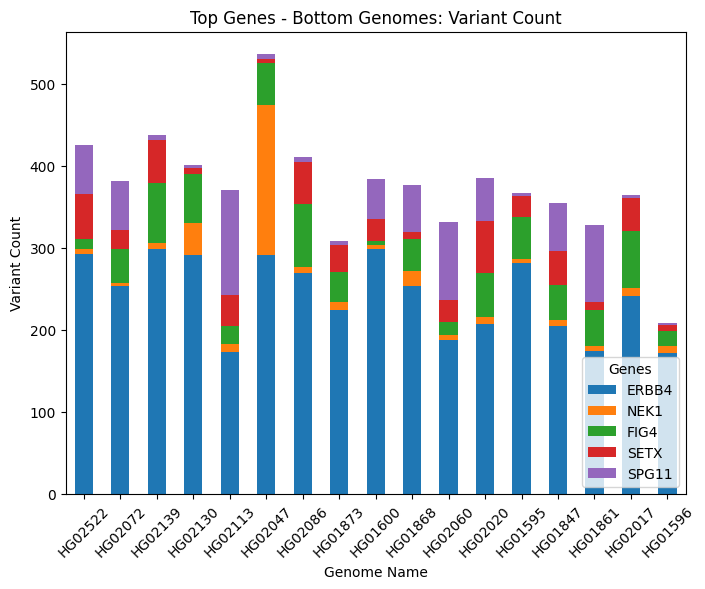

In [147]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()